In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('./data/Stunting_Dataset.csv')
df.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


ga ada data null

In [60]:
df.duplicated().sum()

2427

In [4]:
df.describe(include='all')

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000,10000
unique,2,NaN,NaN,NaN,NaN,NaN,1,2
top,Male,NaN,NaN,NaN,NaN,NaN,No,Yes
freq,6204,NaN,NaN,NaN,NaN,NaN,10000,7955
mean,NaN,14.255000,2.757600,49.117400,7.631990,68.85492,NaN,NaN
std,NaN,7.923285,0.291092,0.439814,1.720461,8.90664,NaN,NaN
min,NaN,6.000000,2.000000,48.000000,2.900000,49.00000,NaN,NaN
25%,NaN,10.000000,2.800000,49.000000,6.400000,65.00000,NaN,NaN
50%,NaN,13.000000,2.800000,49.000000,7.700000,68.30000,NaN,NaN
75%,NaN,15.000000,2.900000,49.000000,9.000000,72.20000,NaN,NaN


In [5]:
df.Gender.value_counts()

Male      6204
Female    3796
Name: Gender, dtype: int64

In [6]:
df.Stunting.value_counts()

Yes    7955
No     2045
Name: Stunting, dtype: int64

### Feature Encode

In [7]:
def ordinal_encoder(data,feature,feature_rank):
    
    ordinal_dict = {}
    
    for i, feature_value in enumerate(feature_rank):
        ordinal_dict[feature_value]=i+1
    
    data[feature] = data[feature].map(lambda x: ordinal_dict[x])
    
    return data

In [8]:
dt = df.copy()

In [9]:
dt = ordinal_encoder(dt, 'Gender',['Male', 'Female'])
dt = ordinal_encoder(dt, 'Stunting',['Yes', 'No'])
dt = ordinal_encoder(dt, 'Breastfeeding',['Yes', 'No'])
dt.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,1,17,3.0,49,10.0,72.2,2,2
1,2,11,2.9,49,2.9,65.0,2,1
2,1,16,2.9,49,8.5,72.2,2,1
3,1,31,2.8,49,6.4,63.0,2,1
4,1,15,3.1,49,10.5,49.0,2,1


### Visalisasi

Text(0.5, 0, 'umur(Tahun)')

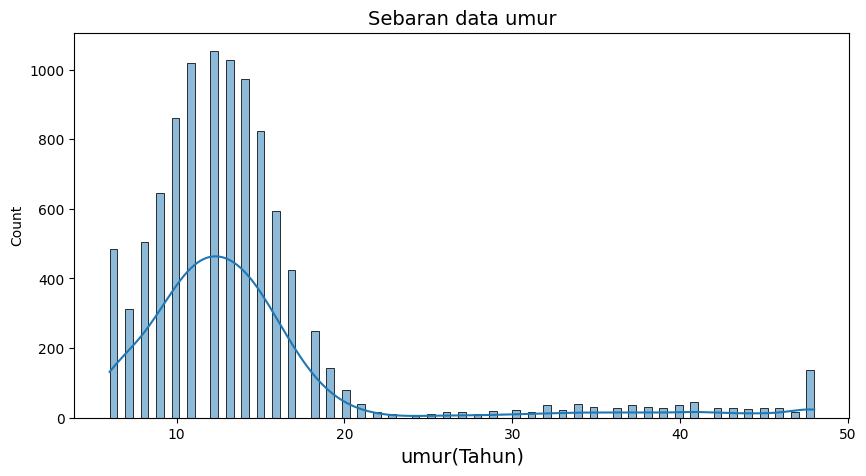

In [29]:
plt.subplots(figsize=(10, 5))
sns.histplot(data=dt, x="Age", kde=True)
plt.title("Sebaran data umur", fontsize=14)
plt.xlabel("umur(Tahun)", fontsize=14)

Text(0.5, 1.0, 'Sebaran data Target')

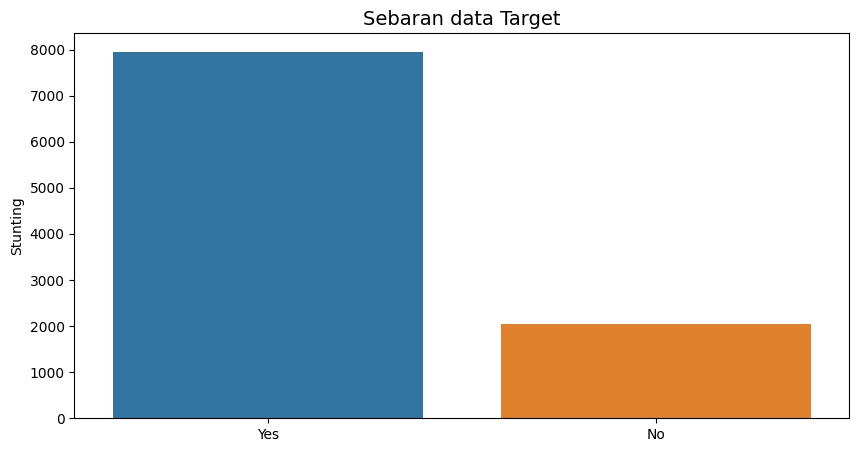

In [52]:
plt.subplots(figsize=(10, 5))
sns.barplot(x=df.Stunting.value_counts().index, y=df.Stunting.value_counts())
plt.title("Sebaran data Target", fontsize=14)

In [46]:
dt['Gender'].value_counts()

1    6204
2    3796
Name: Gender, dtype: int64

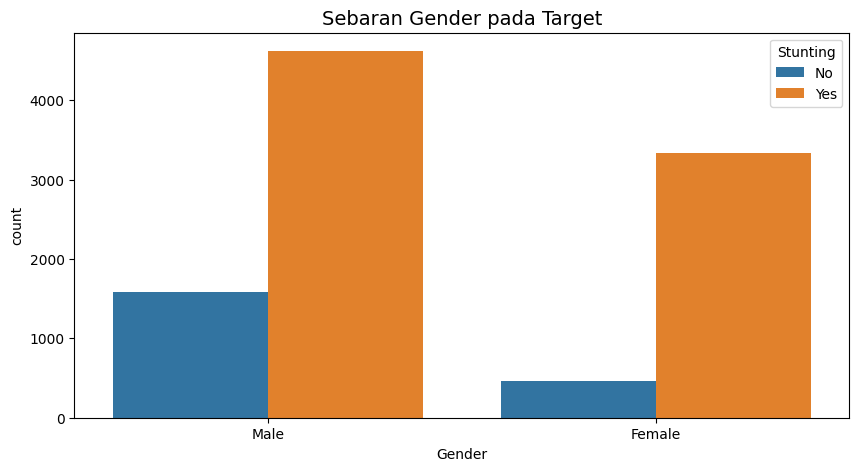

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Gender', hue='Stunting')
plt.title('Sebaran Gender pada Target', fontsize=14)
plt.show()

In [42]:
dt[dt['Age'] <= 25]

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,1,17,3.0,49,10.0,72.2,2,2
1,2,11,2.9,49,2.9,65.0,2,1
2,1,16,2.9,49,8.5,72.2,2,1
4,1,15,3.1,49,10.5,49.0,2,1
5,2,11,2.8,49,8.5,65.0,2,2
...,...,...,...,...,...,...,...,...
9995,1,15,3.0,49,9.0,63.0,2,1
9996,2,12,2.8,48,7.7,63.0,2,2
9997,1,16,2.8,49,7.7,49.0,2,2
9998,1,14,2.8,49,10.0,69.0,2,1


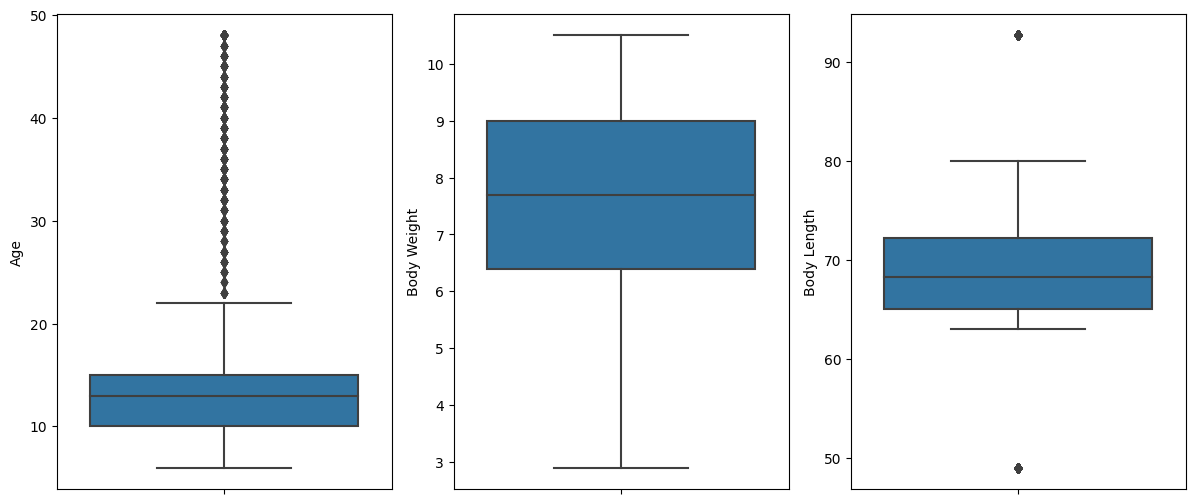

In [31]:
plt.figure(figsize=(20,15))
n=1
for col in ['Age','Body Weight',	'Body Length']:
    plt.subplot(3,5,n)
    n+=1
    sns.boxplot(y=dt[col])
    plt.tight_layout()

<Axes: >

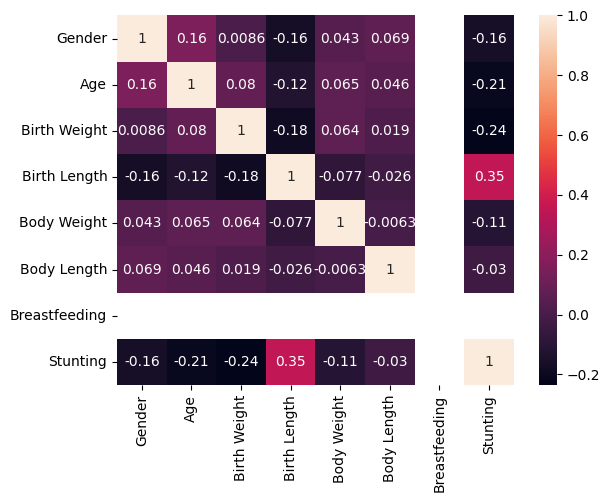

In [22]:
sns.heatmap(dt.corr(), annot=True)

In [61]:
%store dt

Stored 'dt' (DataFrame)


## **Note**
```
datanya bersih tapi banyak yang data per baris yang duplikat 
value pada Body Weight dan Body Length bukan metrik umum, nilainya tidak berada di rata" manusia 
terdapat outliers pada Age dan Body Length, pada Age kebanyakan data dibawah 25 tahun 
Label banyak yang Stunting, masih imbalance 
berdasar korelasi pengaruh Stunting/tidak Stunting paling tinggi pada Birth Length 
```
